# Agricultural Predictive Analytics Project
Aspiring Predictive Data Analyst (AgriTech focus)

This google colab notebook project demonstrates end-to-end predictive analysis of crop yield based on rainfall and risk features.
And also simulates real-world agricultural data issues such as missing rainfall
and yield values and prepares the dataset for predictive modeling.


###  Data Cleaning & Feature Engineering

- Loaded messy agricultural dataset
- Handled missing rainfall and yield values
- Created Low Rainfall and Low Yield risk flags
- Prepared dataset for predictive modeling

### Steps:
1. Inspect dataset structure and statistics
2. Handle missing values (forward-fill or mean imputation)
3. Engineer risk features based on rainfall thresholds
4. Verify correlations and visualize patterns

### Exploratory Data Analysis
Initial exploration is performed to examine dataset structure, check data types,
and summarize key statistics for rainfall and yield.


In [68]:
import pandas as pd
import numpy as np

data = {
    "Year": [2018, 2019, 2020, 2021, 2022, 2023],
    "Rainfall_mm": [110, 130, np.nan, 150, 140, np.nan],
    "Yield_tons": [2.5, 3.0, 2.1, np.nan, 3.2, 3.1]
}

df = pd.DataFrame(data)
df


,Year,Rainfall_mm,Yield_tons
0,2018,110.0,2.5
1,2019,130.0,3.0
2,2020,NaN,2.1
3,2021,150.0,NaN
4,2022,140.0,3.2
5,2023,NaN,3.1


In [69]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         6 non-null      int64  
 1   Rainfall_mm  4 non-null      float64
 2   Yield_tons   5 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 276.0 bytes


,0
Year,0
Rainfall_mm,2
Yield_tons,1


In [70]:
df["Rainfall_mm"] = df["Rainfall_mm"].fillna(df["Rainfall_mm"].mean())


In [71]:
df.isna().sum()
df


,Year,Rainfall_mm,Yield_tons
0,2018,110.0,2.5
1,2019,130.0,3.0
2,2020,132.5,2.1
3,2021,150.0,NaN
4,2022,140.0,3.2
5,2023,132.5,3.1


In [72]:
# Calculate average rainfall
avg_rainfall = df["Rainfall_mm"].mean()

# Create risk flag (1 = Low rainfall, 0 = Normal)
df["Low_Rainfall_Risk"] = (df["Rainfall_mm"] < avg_rainfall).astype(int)

df


,Year,Rainfall_mm,Yield_tons,Low_Rainfall_Risk
0,2018,110.0,2.5,1
1,2019,130.0,3.0,1
2,2020,132.5,2.1,0
3,2021,150.0,NaN,0
4,2022,140.0,3.2,0
5,2023,132.5,3.1,0


In [73]:
avg_yield = df["Yield_tons"].mean()

df["Low_Yield_Risk"] = (df["Yield_tons"] < avg_yield).astype(int)

df


,Year,Rainfall_mm,Yield_tons,Low_Rainfall_Risk,Low_Yield_Risk
0,2018,110.0,2.5,1,1
1,2019,130.0,3.0,1,0
2,2020,132.5,2.1,0,1
3,2021,150.0,NaN,0,0
4,2022,140.0,3.2,0,0
5,2023,132.5,3.1,0,0


# Correlation between numerical columns

In [74]:

df[["Rainfall_mm", "Yield_tons", "Low_Rainfall_Risk", "Low_Yield_Risk"]].corr()


,Rainfall_mm,Yield_tons,Low_Rainfall_Risk,Low_Yield_Risk
Rainfall_mm,1.000000,0.424045,-0.731925,-0.658733
Yield_tons,0.424045,1.000000,-0.058790,-0.940634
Low_Rainfall_Risk,-0.731925,-0.058790,1.000000,0.250000
Low_Yield_Risk,-0.658733,-0.940634,0.250000,1.000000


##  Predictive Modeling

### Objectives:
- Predict crop yield using rainfall and risk flags
- Evaluate model performance
- Visualize predicted vs actual yields
- Analyze the effect of low rainfall on yield predictions


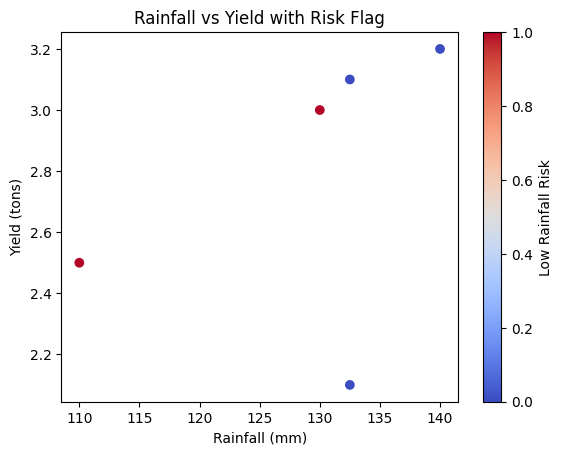

In [75]:
import matplotlib.pyplot as plt

# Scatter plot: Rainfall vs Yield
plt.scatter(df["Rainfall_mm"], df["Yield_tons"], c=df["Low_Rainfall_Risk"], cmap="coolwarm")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (tons)")
plt.title("Rainfall vs Yield with Risk Flag")
plt.colorbar(label="Low Rainfall Risk")
plt.show()


## Correlation and Visualization

The correlation table and scatter plot confirm that low rainfall leads to lower yields.
Color-coded risk flags help identify high-risk seasons for predictive decision-making.


In [76]:
predictive_df = df[["Rainfall_mm", "Yield_tons", "Low_Rainfall_Risk", "Low_Yield_Risk"]]
predictive_df


,Rainfall_mm,Yield_tons,Low_Rainfall_Risk,Low_Yield_Risk
0,110.0,2.5,1,1
1,130.0,3.0,1,0
2,132.5,2.1,0,1
3,150.0,NaN,0,0
4,140.0,3.2,0,0
5,132.5,3.1,0,0


In [77]:
predictive_df.info()
predictive_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rainfall_mm        6 non-null      float64
 1   Yield_tons         5 non-null      float64
 2   Low_Rainfall_Risk  6 non-null      int64  
 3   Low_Yield_Risk     6 non-null      int64  
dtypes: float64(2), int64(2)
memory usage: 324.0 bytes


,Rainfall_mm,Yield_tons,Low_Rainfall_Risk,Low_Yield_Risk
count,6.000000,5.000000,6.000000,6.000000
mean,132.500000,2.780000,0.333333,0.333333
std,13.228757,0.465833,0.516398,0.516398
min,110.000000,2.100000,0.000000,0.000000
25%,130.625000,2.500000,0.000000,0.000000
50%,132.500000,3.000000,0.000000,0.000000
75%,138.125000,3.100000,0.750000,0.750000
max,150.000000,3.200000,1.000000,1.000000


In [78]:
predictive_df.to_csv("cleaned_agri_data.csv", index=False)


Predictive Modeling

- Trained Linear Regression model using Rainfall and risk flags
- Evaluated model using MSE and R²
- Visualized  predicted vs actual yield with risk context
- Analyzed how low rainfall affects yield predictions


## Predictive Dataset Preparation

The cleaned dataset with risk indicators is now ready for predictive modeling.
All missing values have been handled, and low-rainfall and low-yield risk flags
have been added to support feature-based prediction.


# Import libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Load dataset

In [80]:
df = pd.read_csv("cleaned_agri_data.csv")

# Ensuring risk flags are numeric

In [81]:
df["Low_Rainfall_Risk"] = df["Low_Rainfall_Risk"].astype(int)
df["Low_Yield_Risk"] = df["Low_Yield_Risk"].astype(int)


# Handle missing target and features before spliting


In [82]:
df["Yield_tons"] = df["Yield_tons"].fillna(method="ffill")  # fill missing yields
df["Rainfall_mm"] = df["Rainfall_mm"].fillna(df["Rainfall_mm"].mean())  # fill rainfall mean


/tmp/ipython-input-3276111783.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Yield_tons"] = df["Yield_tons"].fillna(method="ffill")  # fill missing yields


# Drop any rows that still have NaN in target (safety)

# Verify no missing values

In [93]:
df = df.dropna(subset=["Yield_tons"])

In [84]:
print("Missing values after cleaning:\n", df.isna().sum())



Missing values after cleaning:
 Rainfall_mm          0
Yield_tons           0
Low_Rainfall_Risk    0
Low_Yield_Risk       0
dtype: int64


In [85]:
X = df[["Rainfall_mm", "Low_Rainfall_Risk", "Low_Yield_Risk"]]
y = df["Yield_tons"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define features and target


In [87]:
X = df[["Rainfall_mm", "Low_Rainfall_Risk", "Low_Yield_Risk"]]

# spliting the data
This creates 80% training data and 20% testing data.

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# makes predictions

In [90]:
y_pred = model.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.55
R^2 Score: -7.84


# visualize predictions

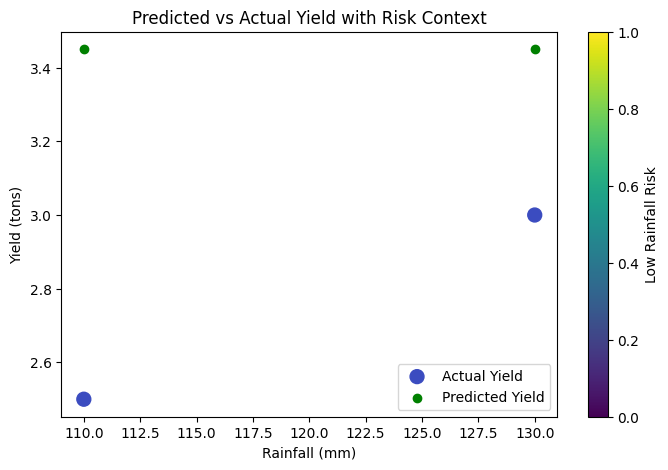

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X_test["Rainfall_mm"], y_test, c=X_test["Low_Rainfall_Risk"], cmap="coolwarm", s=100, label="Actual Yield")
plt.scatter(X_test["Rainfall_mm"], y_pred, color="green", label="Predicted Yield")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (tons)")
plt.title("Predicted vs Actual Yield with Risk Context")
plt.colorbar(label="Low Rainfall Risk")
plt.legend()
plt.show()

## Insights

- Low rainfall strongly correlates with lower crop yield
- Risk flags help anticipate potential yield drops
- Predictive model supports decision-making in AgriTech supply chains
- Cleaned and feature-engineered dataset is ready for further modeling or deployment
